In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [21]:
# open pickle

fname = '/mnt/home/gwoollard/ceph/repos/cryomethods_comparison_pipeline/results/analysis_results_20240415-npix224_submission_5.pkl'

with open(fname, 'rb') as f:
    data = pickle.load(f)


<Axes: >

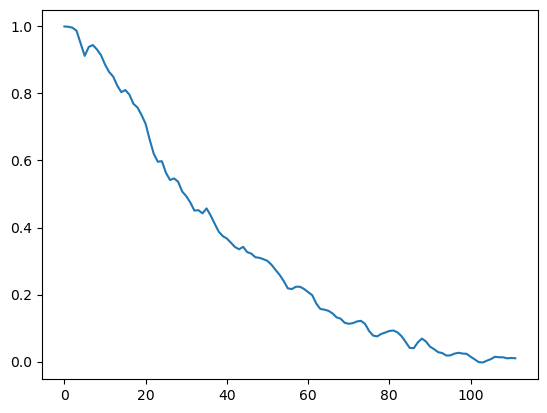

In [22]:
i,j = 0,0
fsc = data['fsc']['computed_assets']['fsc_matrix'][i,j]
pd.Series(fsc).plot()

In [23]:
metadata = pd.read_csv('/mnt/home/gwoollard/ceph/repos/cryomethods_comparison_pipeline/osf/metadata.csv')
metadata.sort_values('pc1', inplace=True)
metadata.head()


,volumes,populations_count,pc1,populations
3238,13396.mrc,1,-231.621006,0.000030
3837,32412.mrc,1,-230.330399,0.000030
3361,16057.mrc,1,-230.129599,0.000030
3541,20321.mrc,1,-229.605355,0.000030
3665,24907.mrc,2,-228.763719,0.000059


In [24]:
fscs_sorted = data['fsc']['computed_assets']['fsc_matrix'][metadata.index.tolist()]

In [25]:
units_Angstroms = 2 * 2.146 / (np.arange(1,112+1) / 112)

([<matplotlib.axis.XTick at 0x155518c6fdf0>,
 [Text(0, 0, '480.7'),
  Text(20, 0, '22.89'),
  Text(40, 0, '11.72'),
  Text(60, 0, '7.88'),
  Text(80, 0, '5.93'),
  Text(100, 0, '4.76')])

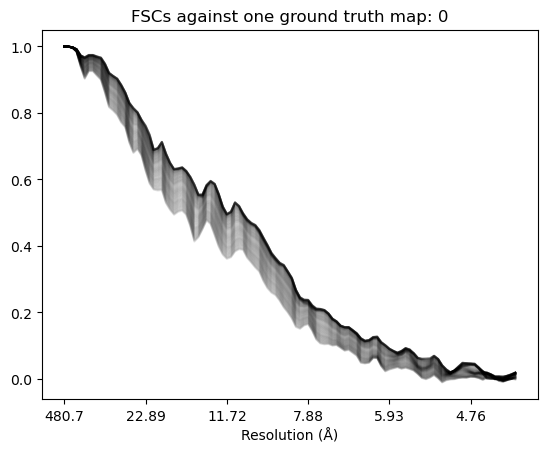

In [26]:
i=0
sr = pd.DataFrame(fscs_sorted[i].T)
sr.plot(legend=False, alpha=0.1, color='k')
plt.title(f'FSCs against one ground truth map: {i}')
plt.xlabel('Resolution (Å)')
res_bins_plot = range(0,112+1,20)
plt.xticks(res_bins_plot, units_Angstroms[res_bins_plot].round(2).astype(str))

In [27]:
def res_at_fsc_threshold(fscs, threshold=0.5):
    res_fsc_half = np.argmin(fscs > threshold, axis=-1)
    fraction_nyquist = 0.5*res_fsc_half / fscs.shape[-1]
    return res_fsc_half, fraction_nyquist
res_fsc_half, fraction_nyquist = res_at_fsc_threshold(fscs_sorted)


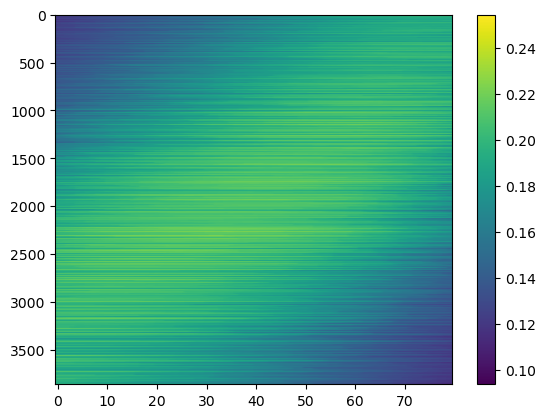

In [8]:
plt.imshow(fraction_nyquist, aspect='auto')
plt.colorbar()

Text(0.5, 1.0, 'Resolution at which FSC crosses 0.5')

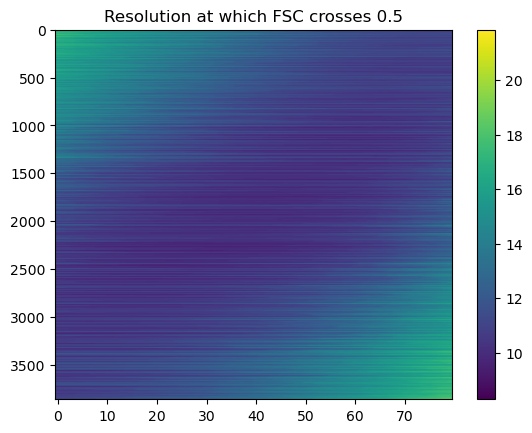

In [9]:
plt.imshow(units_Angstroms[res_fsc_half], aspect='auto')
plt.colorbar()
plt.title('Resolution at which FSC crosses 0.5')